In [4]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("Housing.csv")

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DSU-CSCL8-20\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


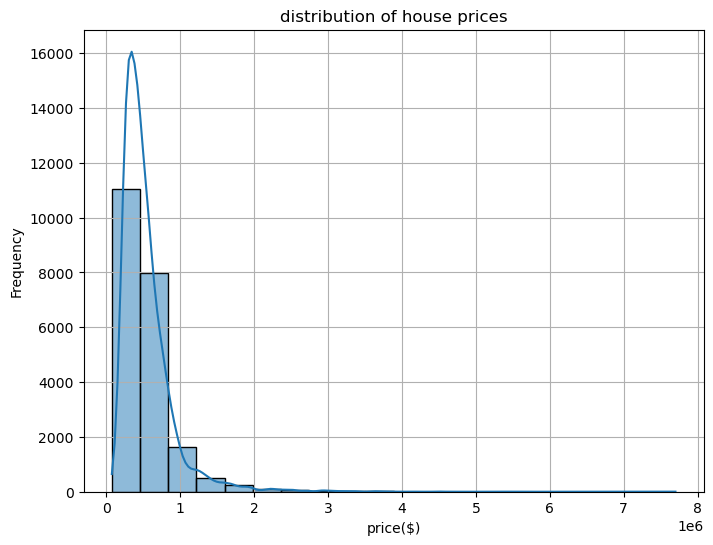

In [5]:
plt.figure(figsize=(8,6))
sns.histplot(data['price'],bins=20,kde=True)
plt.title("distribution of house prices")
plt.xlabel("price($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

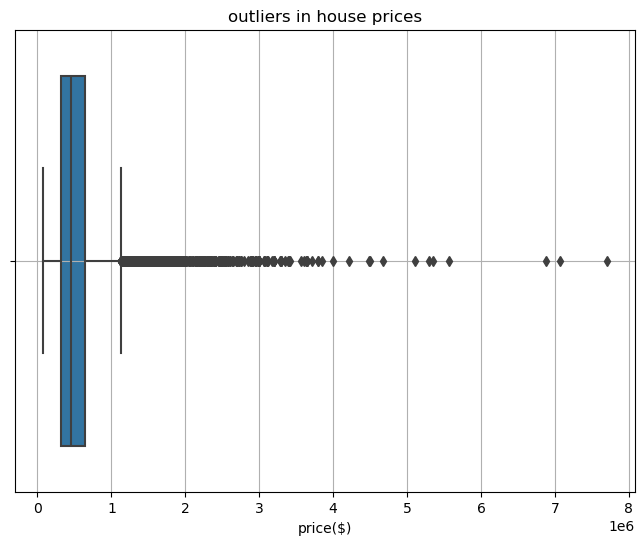

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='price')
plt.title("outliers in house prices")
plt.xlabel("price($)")
plt.grid(True)
plt.show()

In [9]:
data=data[data['price']<9000000]

In [10]:
data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [15]:
def find_boundaries(variable):
    q1=data[variable].quantile(0.25)
    q2=data[variable].quantile(0.75)
    iqr=q3*q19
    lower_boundary=q1-1.5*iqr
    upper_boundary=q3+1.5*iqr
    return lower_boundary,upper_boundary
lower_price,upper_price=find_boundaries('price')
data.price=np.where(data.price>upper_price,upper_price,data.price)
data.price=np.where(data.price


SyntaxError: incomplete input (1417645866.py, line 10)

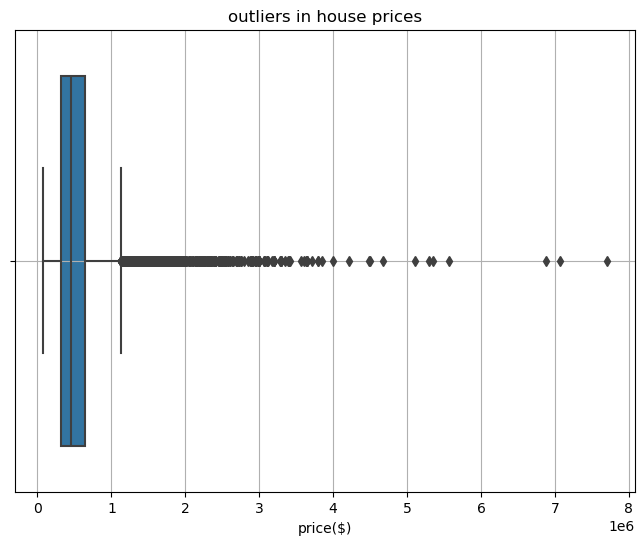

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='price')
plt.title("outliers in house prices")
plt.xlabel("price($)")
plt.grid(True)
plt.show()

In [13]:
numeric_data=data.select_dtypes(include=[float,int])

In [14]:
correlation_matrix=numeric_data.corr()

In [16]:
print(correlation_matrix)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001240   0.005158    -0.012259 -0.132109   
price         -0.016762  1.000000  0.308377   0.525136     0.702035  0.089661   
bedrooms       0.001240  0.308377  1.000000   0.515932     0.576693  0.031713   
bathrooms      0.005158  0.525136  0.515932   1.000000     0.754665  0.087740   
sqft_living   -0.012259  0.702035  0.576693   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031713   0.087740     0.172826  1.000000   
floors         0.018524  0.256793  0.175466   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266370 -0.006578   0.063744     0.103818  0.021604   
view           0.011592  0.397294  0.079543   0.187737     0.284611  0.074710   
condition     -0.023784  0.036361  0.028502  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356978   0.664983     0.762704  0.113621   
sqft_above    -0.010843  0.6

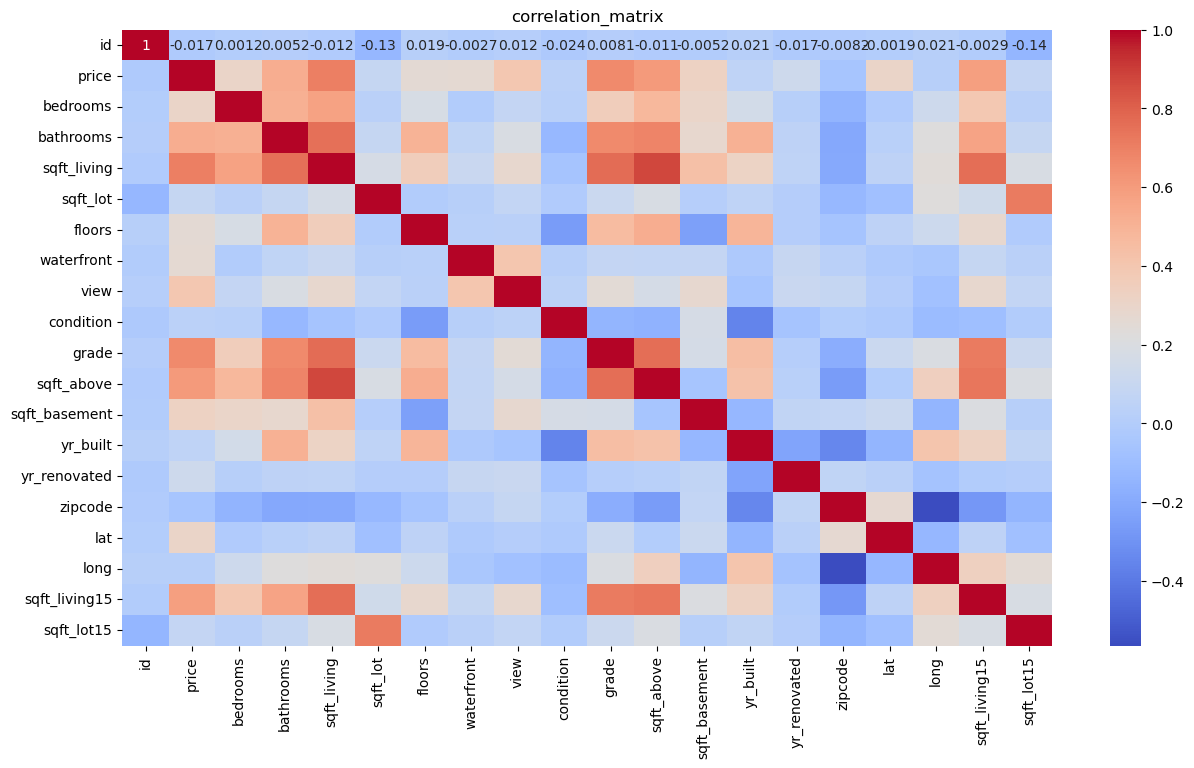

In [20]:

plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("correlation_matrix")
plt.show()

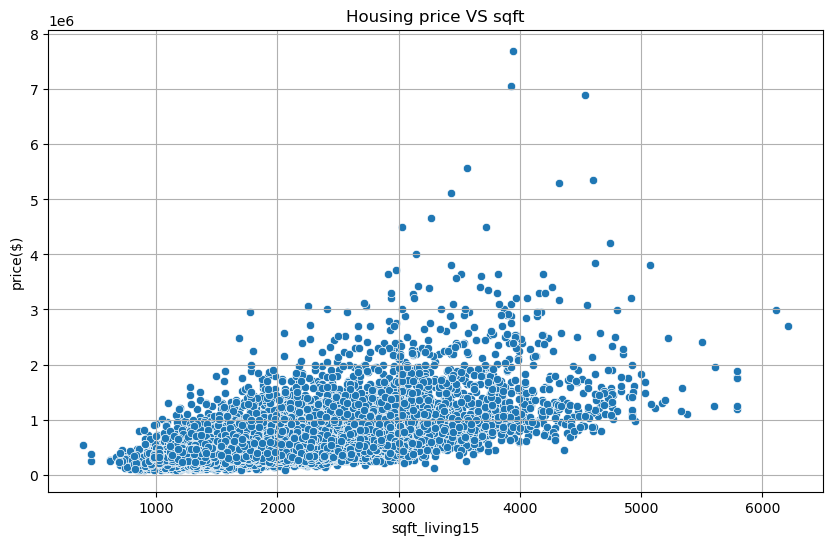

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='sqft_living15',y='price')
plt.title("Housing price VS sqft")
plt.xlabel("sqft_living15")
plt.ylabel("price($)")
plt.grid(True)
plt.show()

In [2]:
data = {
    'voltage': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'current': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [5]:
df= pd.DataFrame(data)
df

,voltage,current
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


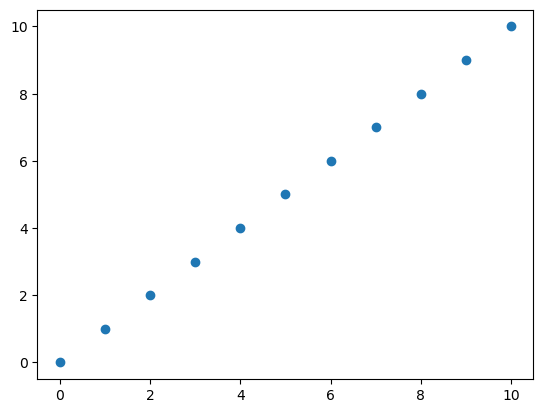

In [8]:
plt.scatter(df['voltage'], df['current'])


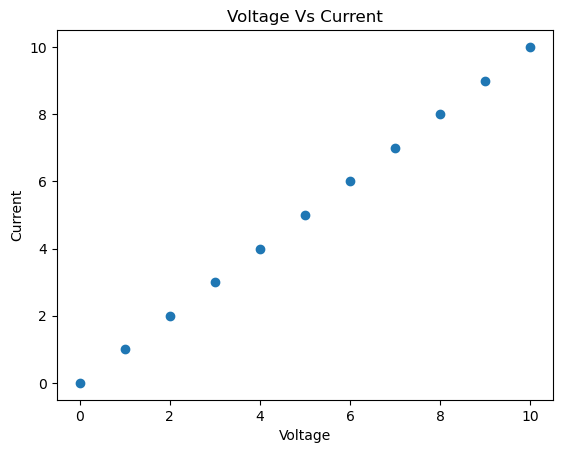

In [9]:
plt.scatter(data=df, x="voltage", y="current")
plt.title("Voltage Vs Current")
plt.xlabel("Voltage")
plt.ylabel("Current")
plt.show()

In [12]:
homeprice ={'area': [2600, 3000, 3200, 3600, 4000],'price':[550000, 565000, 610000, 680000, 72500]}
df = pd.DataFrame(homeprice)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,72500


In [ ]:
"C:\Users\DSU-CSCL8-20\Downloads\Salary_Data.csv"

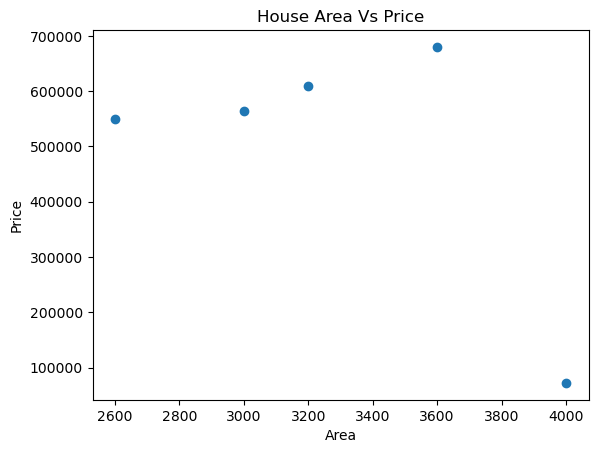

In [13]:
plt.scatter(data=df, x='area', y='price')
plt.title("House Area Vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()


In [14]:
salary_df = pd.read_csv(r"C:\Users\DSU-CSCL8-20\Downloads\Salary_Data.csv")

salary_df.shape

salary_df.info()

salary_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


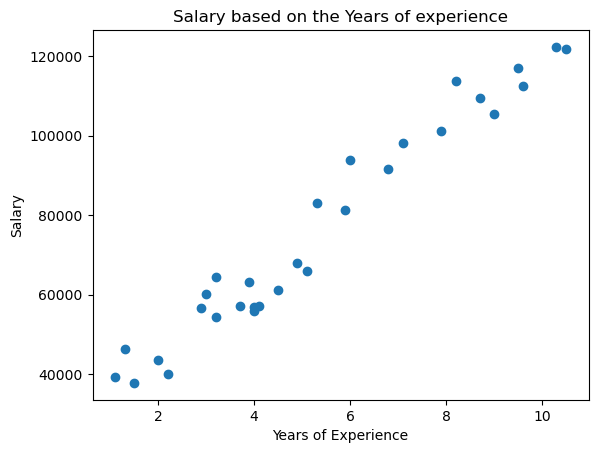

In [15]:
plt.scatter(data=salary_df, x='YearsExperience', y='Salary')
plt.title("Salary based on the Years of experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [16]:
x = salary_df.loc[:, 'YearsExperience'].values
y = salary_df.loc[:, 'Salary'].values

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.3, random_state=0)

In [20]:
x_train.shape, x_test.shape, y_train, y_test.shape

((21,),
 (9,),
 array([101302,  56642,  66029,  64445,  61111, 113812,  91738,  46205,
        121872,  60150,  39891,  81363,  93940,  57189,  54445, 105582,
         43525,  39343,  98273,  67938,  56957], dtype=int64),
 (9,))

In [21]:
type(x_train)

numpy.ndarray

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
reg_model = LinearRegression()

In [30]:
reg_model.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [32]:
reg_model.coef_

array([[9360.26128619]])

In [35]:
reg_model.intercept_

array([26777.3913412])

In [36]:
y_predicted = reg_model.predict(x_test.reshape(-1, 1))

In [37]:
y_predicted

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [38]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088], dtype=int64)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
r_square = r2_score(y_test, y_predicted)

In [41]:
r_square

0.9740993407213511

In [42]:
rmse = mean_squared_error(y_test, y_predicted)

In [43]:
rmse

23370078.800832972

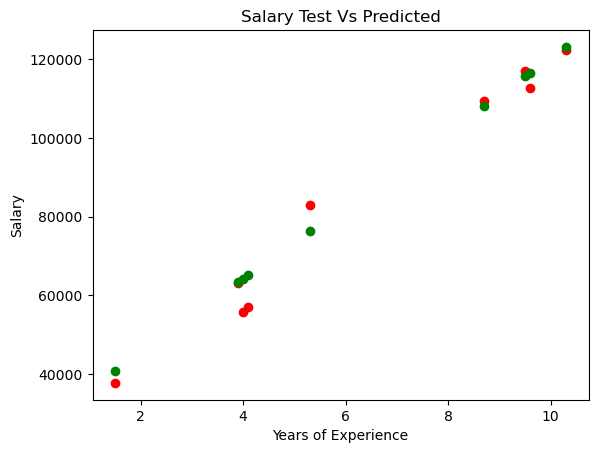

In [44]:
plt.scatter(x=x_test, y=y_test, color='red')
plt.scatter(x=x_test, y=y_predicted, color='green')
plt.title("Salary Test Vs Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()